# Laboratorio No. 1 - Modelación y Simulación

Manuel Rodas - 21509 / Jose Santisteban - 21153 / Sebastian Solorzano - 21826

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### 1. Funcion objetivo

In [18]:
def f(x, y):
    return (x - 3)**2 + (y - 2)**2

### 2. Parametros del PSO 

In [19]:
N = 40 
w = 0.5 
c1 = 1.5 
c2 = 1.5 
max_iter = 100 
threshold = 1e-6 

### 3. Inicializar particulas 

In [20]:
particles = np.random.uniform(-10, 10, (N, 2))
velocities = np.random.uniform(-1, 1, (N, 2))
personal_best = particles.copy()
global_best = personal_best[np.argmin([f(p[0], p[1]) for p in personal_best])]

history = [particles.copy()]

### 4. Funcion para visualizacion

In [21]:
def update_plot(ax, particles, iteration):
    ax.clear()
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    ax.contour(X, Y, Z, levels=20)
    ax.scatter(particles[:, 0], particles[:, 1], c='r', s=10)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_title(f'Iteración {iteration}')

### 5. Bucle del PSO

In [22]:
for iteration in range(max_iter):
    for i in range(N):
        r1, r2 = np.random.rand(2)
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (personal_best[i] - particles[i]) +
                         c2 * r2 * (global_best - particles[i]))
        
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], -10, 10)
        
        if f(particles[i][0], particles[i][1]) < f(personal_best[i][0], personal_best[i][1]):
            personal_best[i] = particles[i]
        
        if f(particles[i][0], particles[i][1]) < f(global_best[0], global_best[1]):
            global_best = particles[i]
    
    history.append(particles.copy())
    
    if iteration > 0 and np.linalg.norm(global_best - history[-2][np.argmin([f(p[0], p[1]) for p in history[-2]])]) < threshold:
        break

### 6. Resultados

In [23]:
print(f"Mejor solución encontrada: x = {global_best[0]:.4f}, y = {global_best[1]:.4f}")
print(f"Valor mínimo de la función: {f(global_best[0], global_best[1]):.4f}")
print(f"Número de iteraciones: {len(history)-1}")

Mejor solución encontrada: x = 3.0000, y = 2.0000
Valor mínimo de la función: 0.0000
Número de iteraciones: 54


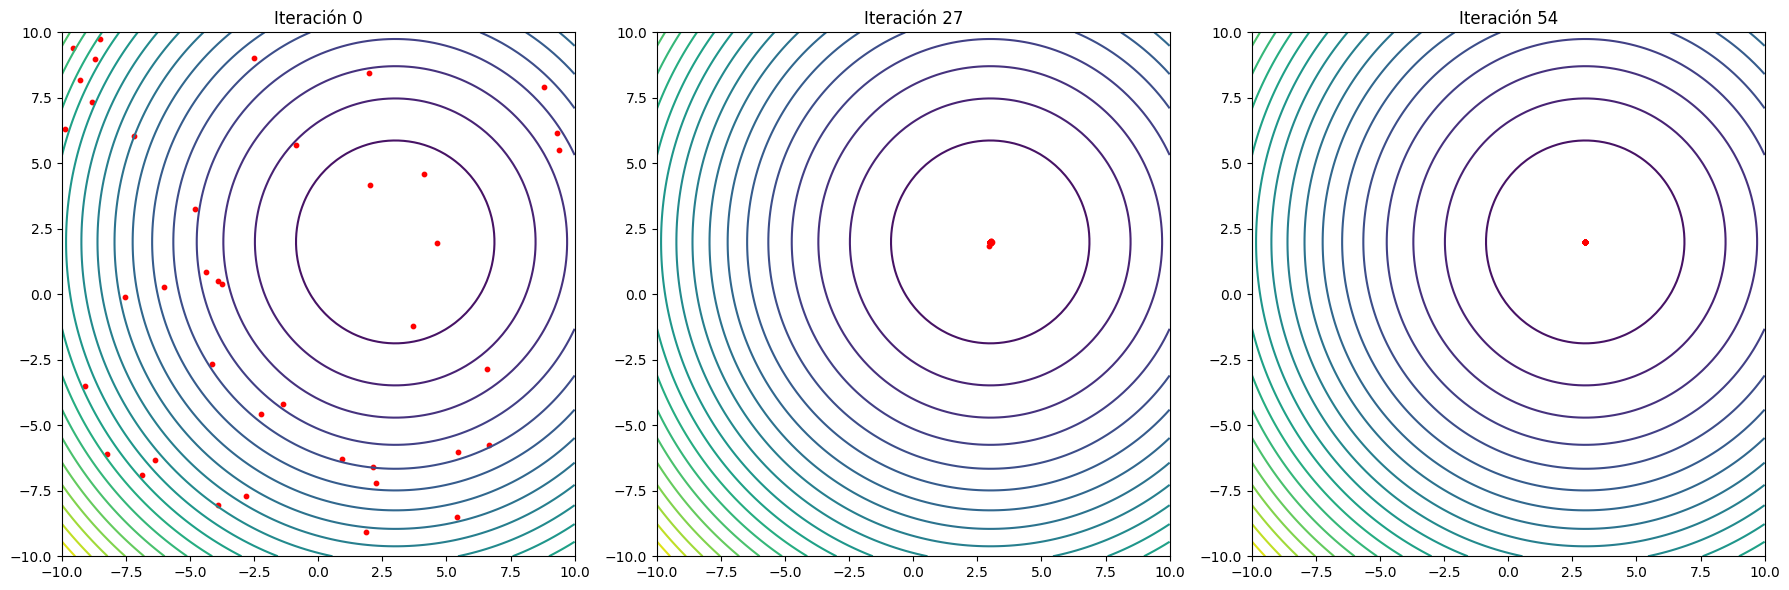

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
update_plot(axs[0], history[0], 0)
update_plot(axs[1], history[len(history)//2], len(history)//2)
update_plot(axs[2], history[-1], len(history)-1)
plt.tight_layout()
plt.show()